<a href="https://colab.research.google.com/github/Jose897/fingerVacunacion/blob/feature1/finger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vacunacion Covid** 

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Datos en https://www.kaggle.com/dhruvildave/top-play-store-games
id= '1Yxzlg45C197hUqA8OHV1juU6mpa5kZTz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('country_vaccinations.csv')

In [ ]:
vacunacion=pd.read_csv('country_vaccinations.csv')

In [ ]:
vacunacion

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,"1,367.00",nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,"1,367.00",nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,"1,367.00",nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,"1,367.00",nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12509,Zimbabwe,ZWE,2021-04-12,"234,579.00","205,275.00","29,304.00","11,087.00","12,724.00",1.58,1.38,0.20,856.00,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12510,Zimbabwe,ZWE,2021-04-13,"248,355.00","218,516.00","29,839.00","13,776.00","12,246.00",1.67,1.47,0.20,824.00,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12511,Zimbabwe,ZWE,2021-04-14,"262,128.00","231,632.00","30,496.00","13,773.00","11,816.00",1.76,1.56,0.21,795.00,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...
12512,Zimbabwe,ZWE,2021-04-15,"285,881.00","252,932.00","32,949.00","23,753.00","13,172.00",1.92,1.70,0.22,886.00,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1383174384...


In [ ]:
vacunacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12514 entries, 0 to 12513
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12514 non-null  object 
 1   iso_code                             12514 non-null  object 
 2   date                                 12514 non-null  object 
 3   total_vaccinations                   7476 non-null   float64
 4   people_vaccinated                    6811 non-null   float64
 5   people_fully_vaccinated              4901 non-null   float64
 6   daily_vaccinations_raw               6285 non-null   float64
 7   daily_vaccinations                   12297 non-null  float64
 8   total_vaccinations_per_hundred       7476 non-null   float64
 9   people_vaccinated_per_hundred        6811 non-null   float64
 10  people_fully_vaccinated_per_hundred  4901 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
short_vacunacion = vacunacion.loc[:,['country','iso_code','people_vaccinated','people_fully_vaccinated']]

In [ ]:
short_vacunacion

,country,iso_code,people_vaccinated,people_fully_vaccinated
0,Afghanistan,AFG,0.00,nan
1,Afghanistan,AFG,nan,nan
2,Afghanistan,AFG,nan,nan
3,Afghanistan,AFG,nan,nan
4,Afghanistan,AFG,nan,nan
...,...,...,...,...
12509,Zimbabwe,ZWE,"205,275.00","29,304.00"
12510,Zimbabwe,ZWE,"218,516.00","29,839.00"
12511,Zimbabwe,ZWE,"231,632.00","30,496.00"
12512,Zimbabwe,ZWE,"252,932.00","32,949.00"


In [ ]:
short_vacunacion.dtypes

country                     object
iso_code                    object
people_vaccinated          float64
people_fully_vaccinated    float64
dtype: object

In [ ]:
grupo_vacunacion= short_vacunacion.groupby(['country','iso_code']).sum()

In [ ]:
grupo_vacunacion

,,people_vaccinated,people_fully_vaccinated
country,iso_code,,
Afghanistan,AFG,"182,200.00",0.00
Albania,ALB,"14,501.00","2,316.00"
Algeria,DZA,0.00,0.00
Andorra,AND,"32,024.00","8,185.00"
Angola,AGO,"699,961.00",0.00
...,...,...,...
Venezuela,VEN,"374,574.00",0.00
Vietnam,VNM,"1,709,184.00",0.00
Wales,OWID_WLS,"88,440,537.00","18,454,054.00"


In [ ]:
grupo_vacunacion.reset_index()

,country,iso_code,people_vaccinated,people_fully_vaccinated
0,Afghanistan,AFG,"182,200.00",0.00
1,Albania,ALB,"14,501.00","2,316.00"
2,Algeria,DZA,0.00,0.00
3,Andorra,AND,"32,024.00","8,185.00"
4,Angola,AGO,"699,961.00",0.00
...,...,...,...,...
181,Venezuela,VEN,"374,574.00",0.00
182,Vietnam,VNM,"1,709,184.00",0.00
183,Wales,OWID_WLS,"88,440,537.00","18,454,054.00"
184,Zambia,ZMB,"1,422.00",0.00


In [ ]:
ordenado_grupo_vacunacion= grupo_vacunacion.sort_values('people_vaccinated',ascending=False).reset_index()

In [ ]:
#1- Obtener el país con mayor cantidad de gente vacunada.
ordenado_grupo_vacunacion.head(1)

,country,iso_code,people_vaccinated,people_fully_vaccinated
0,United States,USA,"5,694,525,514.00","2,905,621,619.00"


In [ ]:
ranking_vacunacion= ordenado_grupo_vacunacion.head(10).sort_values('people_vaccinated',ascending=False).reset_index()

In [ ]:
ranking_vacunacion.count()

index                      10
country                    10
iso_code                   10
people_vaccinated          10
people_fully_vaccinated    10
dtype: int64

In [ ]:
ranking_vacunacion

,index,country,iso_code,people_vaccinated,people_fully_vaccinated
0,0,United States,USA,"5,694,525,514.00","2,905,621,619.00"
1,1,India,IND,"2,770,453,635.00","435,329,240.00"
2,2,United Kingdom,GBR,"1,888,316,918.00","211,023,831.00"
3,3,England,OWID_ENG,"1,602,381,761.00","168,949,237.00"
4,4,Brazil,BRA,"685,427,815.00","182,365,505.00"
5,5,Germany,DEU,"565,729,627.00","231,674,194.00"
6,6,Turkey,TUR,"517,817,457.00","271,779,930.00"
7,7,Israel,ISR,"436,415,856.00","312,377,435.00"
8,8,France,FRA,"405,588,187.00","144,166,922.00"
9,9,Italy,ITA,"397,865,770.00","176,691,559.00"


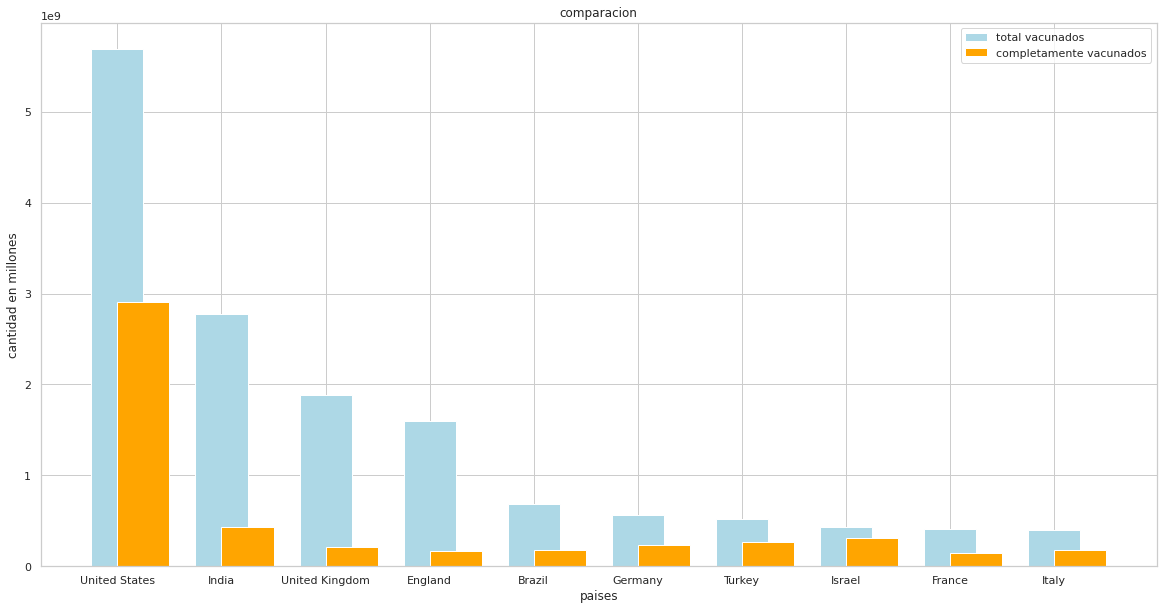

In [ ]:
#2- Realizar una visualización que permita comparar (vaccinated) con (fully vaccinated), Los 10 paises con mayor vacunacion
fig = plt.figure(figsize = (20,10))
plt.bar(ranking_vacunacion['country'],ranking_vacunacion['people_vaccinated'], label= 'total vacunados',width=-0.5, color='lightblue')
plt.bar(ranking_vacunacion['country'],ranking_vacunacion['people_fully_vaccinated'], label= 'completamente vacunados',width=0.5,align='edge', color='orange')

plt.title('comparacion')

plt.ylabel('cantidad en millones')
plt.xlabel('paises')
plt.legend()